# Import

In [187]:
import java.util.stream.Stream;
import java.util.function.*;
import java.util.Collection.*;
import java.util.stream.Collectors;
import java.nio.file.Files;
import java.nio.file.*;
import java.io.File.*;
import java.nio.charset.StandardCharsets;

---

# Setup

In [125]:
Supplier<Stream<Integer>> intStreamSupplier = () -> Stream.of(1,2,2,3,4,5,5,6,7,8,9,9,9,10,10);
List<String> someList = Arrays.asList("x,y,z", "999,666,333");
List<Integer> numbers = Arrays.asList(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24);

In [126]:
public class Thing{
    private int id;
    private int thingNum;

    public Thing(int id, int thingNum) {
        this.id = id;
		this.thingNum = thingNum;
	}

    public void setThingNum(int thingNum){
         this.thingNum = thingNum;
    }
    
    public int getThingNum() {
		return this.thingNum;
	}
    
    public void setId(int id){
         this.id = id;
    }
    
    public int getId() {
		return this.id;
	}

    @Override
    public String toString(){
        return "thing's id = " + id + " and number = " + thingNum;
    }
}

In [127]:
Thing t1 = new Thing(1, 100);
Thing t2 = new Thing(2, 50);
Supplier<Stream<Thing>> things = () -> Stream.of(t1, t2);

In [138]:
import java.util.ArrayList;
import java.util.List;

public class Person implements Comparable<Person> {
    private String name;
    private Integer age;
    private Double salary;
    private String title;
    private String gender;
    private String area;

    public Person(String name, Integer age, Double salary, String title, String gender, String area) {
        this.name = name;
        this.age = age;
        this.salary = salary;
        this.title = title;
        this.gender = gender;
        this.area = area;
    }

    public String getName() {
        return name;
    }

    public void setName(String name) {
        this.name = name;
    }

    public Integer getAge() {
        return age;
    }

    public void setAge(Integer age) {
        this.age = age;
    }

    public Double getSalary() {
        return salary;
    }

    public void setSalary(Double salary) {
        this.salary = salary;
    }

    public String getTitle() {
        return title;
    }

    public void setTitle(String title) {
        this.title = title;
    }

    public String getGender() {
        return gender;
    }

    public void setGender(String gender) {
        this.gender = gender;
    }

    public String getArea() {
        return area;
    }

    public void setArea(String area) {
        this.area = area;
    }

    @Override
    public String toString() {
        return "Person{" +
                "name='" + name + '\'' +
                ", age=" + age +
                ", salary=" + salary +
                ", title='" + title + '\'' +
                ", gender='" + gender + '\'' +
                ", area='" + area + '\'' +
                '}';
    }
    
    @Override
    public int compareTo(Person otherPerson) {
        int ageComparison = this.age.compareTo(otherPerson.age);
        if (ageComparison != 0) {
            return ageComparison;
        }

        return this.salary.compareTo(otherPerson.salary);
    }
}

In [152]:
static List<Person> personList = new ArrayList<Person>();

private static void initPerson() {
    personList.add(new Person("User-A", 18, 3000.0, "FronEnd", "Male", "A Region"));
    personList.add(new Person("User-B", 28, 5000.0, "UI/UX", "FeMale", "B Region"));
    personList.add(new Person("User-C", 38, 7000.0, "BackEnd", "Male", "C Region"));
    personList.add(new Person("User-D", 58, 10000.0, "Manager", "Male", "A Region"));
    personList.add(new Person("User-E", 32, 6500.0, "3D", "FeMale", "C Region"));

}
initPerson();

---

# TOC

- Intermediate Operations
    - Stateless
        - [`unordered()`](#unordered())
        - [`filter()`](#filter())
        - [`map()`](#map())
        - [`mapToInt()`](#mapToInt())
        - [`mapToLong()`](#mapToLong())
        - `mapToDouble()`
        - `flatMap()`
        - `flatMapToInt()`
        - `flatMapToLong()`
        - `flatMapToDouble()`
        - `peek()`
    - Stateful
        - [`distinct()`](#distinct())
        - [`sorted()`](#sorted())
        - [`limit()`](#limit())
        - [`skip()`](#skip())
- Terminal Operation
    - Non-Short-Circuit
        - [`forEach()`](#forEach())
        - [`forEachOrdered()`](#forEachOrdered())
        - [`toArray()`](#toArray())
        - [`reduce()`](#reduce())
        - [`collect()`](#collect)
        - `max()`
        - `min()`
        - `count()`
    - Short-Circuit
        - `anyMatch()`
        - `allMatch()`
        - `noneMatch()`
        - `findFirst()`
        - `findAny()`
        - [`limit()`](#limit())
- [Stream IO](#Stream-IO)

---

# Create Stream

#### Use Collection

In [36]:
List<String> list = new ArrayList(Arrays.asList(intStreamSupplier.get().toArray()));
Stream<String> stream = list.stream();
Stream<String> parallelStream = list.parallelStream();

#### Use Arrays

In [39]:
Integer[] nums = new Integer[]{5,4,3,2,1};
Stream<Integer> stream = Arrays.stream(nums);
stream.forEach(System.out::print);

54321

#### Use Stream

In [41]:
Stream<Integer> stream = Stream.of(1,2,3,4,5,6);
stream.forEach(System.out::print);

123456

In [52]:
Stream<Integer> stream2 = Stream.iterate(1, (x) -> x + 2).limit(5);
stream2.forEach(System.out::println);

1
3
5
7
9


In [53]:
Stream<Double> stream3 = Stream.generate(Math::random).limit(2);
stream3.forEach(System.out::println);

0.7300979614771675
0.21043144795685287


#### Use `BufferReader.lines()`

In [58]:
BufferedReader reader = new BufferedReader(new FileReader("../../datasets/others/context.txt"));
Stream<String> lineStream = reader.lines();
lineStream.forEach(System.out::println);

I delete all of the context


#### Use `Pattern.splitAsStream()`

In [59]:
Pattern pattern = Pattern.compile(" ");
Stream<String> stringStream = pattern.splitAsStream("Neque porro quisquam est qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit...");
stringStream.forEach(System.out::println);

Neque
porro
quisquam
est
qui
dolorem
ipsum
quia
dolor
sit
amet,
consectetur,
adipisci
velit...


---

# Stateless

### filter()

In [63]:
intStreamSupplier.get().distinct().filter(e -> e % 2 == 0).forEach(System.out::println);

2
4
6
8
10


### map()

In [71]:
Stream<String> s1 = someList.stream().map(s -> s.replaceAll(",", ""));
s1.forEach(System.out::println);

xyz
999666333


### flatMap()

In [88]:
Supplier<Stream<String>> s3Supplier = () -> someList.stream().flatMap(s -> {
    String[] split = s.split(",");
    Stream<String> s2 = Arrays.stream(split);
    return s2;
});

System.out.println(someList);
System.out.println(s3Supplier.get().toList());
s3Supplier.get().forEach(System.out::println);

[x,y,z, 999,666,333]
[x, y, z, 999, 666, 333]
x
y
z
999
666
333


### peek()
> 如同於`map`，能得到流中的每一個元素，但`map`接收的是一個`Function`，有回傳值
>
> 而`peek`接收的是 `Consumer`，沒有回傳值

In [113]:
things.get().peek(t -> t.setThingNum(9999999)).forEach(System.out::println);

thing's id = 1 and number = 9999999
thing's id = 2 and number = 9999999


### mapToInt()

In [14]:
Stream<String> streamMap = Stream.of("hello", "world!");
streamMap.mapToInt(s -> s.length()).forEach(System.out::println);

5
6


### mapToLong()

### mapToDouble()

### flatMapToInt()

### flatMapToLong()

### flatMapToDouble()

### unordered()

In [22]:
// For sequential streams, the presence or absence of an encounter order does not affect performance, only determinism.
Stream.of(5, 1, 2, 6, 3, 7, 4).unordered().forEach(System.out::println);

5
1
2
6
3
7
4


In [21]:
// For parallel streams, relaxing the ordering constraint can sometimes enable more efficient execution
Stream.of(5, 1, 2, 6, 3, 7,4).unordered().parallel().forEach(System.out::println);

3
6
4
2
7
5
1


---

# Stateful

### distinct()
- 透過流中元素的 hashCode() 和 equals() 去除重複元素

In [24]:
intStreamSupplier.get().distinct().forEach(System.out::println);

1
2
3
4
5
6
7
8
9
10


### skip()
- 略過n元素，配合`limit(n)`可實現分頁

In [26]:
intStreamSupplier.get().distinct().skip(9).forEach(System.out::println);

10


### sorted()
- sorted() 自然排序，流中元素需實作Comparable介面
- sorted(Comparator com)：客製排序，自訂Comparator排序器

In [92]:
List<Integer> nl = intStreamSupplier.get().sorted().toList();
System.out.println(nl);

[1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9, 9, 10, 10]


In [93]:
List<Integer> nl = intStreamSupplier.get().sorted((a,b) -> b.compareTo(a)).toList();
System.out.println(nl);

[10, 10, 9, 9, 9, 8, 7, 6, 5, 5, 4, 3, 2, 2, 1]


---

# Non-Short-Circuit

### count()

In [121]:
intStreamSupplier.get().count();

15

### max()

In [123]:
intStreamSupplier.get().max(Integer::compare).get();

10

### min()

In [124]:
intStreamSupplier.get().min(Integer::compare).get();

1

### reduce()
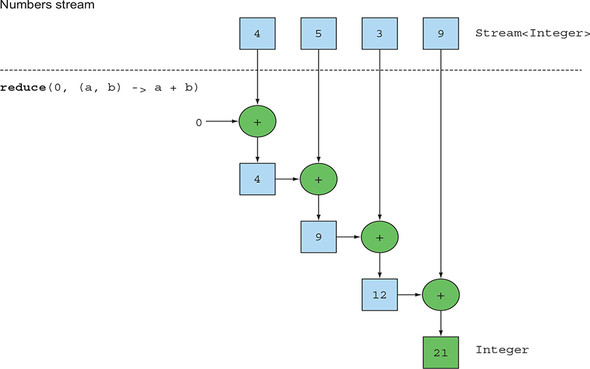

In [25]:
List<Integer> numbers2 = Arrays.asList(1, 2, 3, 4, 5, 6, 7);
numbers2.stream().reduce((x,y)-> x + y).get();

28

In [26]:
numbers2.stream().reduce(100, (x,y)-> x + y);

128

In [27]:
numbers2.stream().reduce(0,
        (x, y) -> {
            System.out.println("stream accumulator: x:" + x + "  y:" + y);
            return x - y;
        },
        (x, y) -> {
            System.out.println("stream combiner: x:" + x + "  y:" + y);
            return x * y;
        });

stream accumulator: x:0  y:1
stream accumulator: x:-1  y:2
stream accumulator: x:-3  y:3
stream accumulator: x:-6  y:4
stream accumulator: x:-10  y:5
stream accumulator: x:-15  y:6
stream accumulator: x:-21  y:7


-28

In [30]:
numbers2.parallelStream().reduce(0,
        (x, y) -> {
            System.out.println("parallelStream accumulator: x:" + x + "  y:" + y);
            return x - y;
        },
        (x, y) -> {
            System.out.println("parallelStream combiner: x:" + x + "  y:" + y);
            return x * y;
        });

parallelStream accumulator: x:0  y:2
parallelStream accumulator: x:0  y:6
parallelStream accumulator: x:0  y:1
parallelStream accumulator: x:0  y:4
parallelStream accumulator: x:0  y:3
parallelStream accumulator: x:0  y:7
parallelStream accumulator: x:0  y:5
parallelStream combiner: x:-6  y:-7
parallelStream combiner: x:-2  y:-3
parallelStream combiner: x:-1  y:6
parallelStream combiner: x:-4  y:-5
parallelStream combiner: x:20  y:42
parallelStream combiner: x:-6  y:840


-5040

In [74]:
List<Integer> num = Arrays.asList(1, 3, 5, 7, 9, 12);
num.stream().reduce((x, y) -> {
    System.out.println("x:"+x);
    return x + y;
}).get();

x:1
x:4
x:9
x:16
x:25


37

### forEach()

In [34]:
List<String> strAry = Arrays.asList( "Jhonny", "David", "Jack", "Duke", "Jill","Dany","Julia","Jenish","Divya");

strAry.stream().forEach(s-> {
			if("Jack".equalsIgnoreCase(s)) System.out.println(s);
		});

Jack


### forEachOrdered()
- Single Thread : 保證循環時元素是依照原來的順序逐一循環的
- Parallel Thread : ？

In [68]:
Stream.of("DDD,","AAA,","BBB,","CCC").forEachOrdered(System.out::print)

DDD,AAA,BBB,CCC

In [69]:
Stream.of("AAA,","BBB,","CCC,","DDD").parallel().forEachOrdered(System.out::print);

AAA,BBB,CCC,DDD

### collect()
- [Collectors](#Java-Related/Util/Collectors.ipynb)


In [153]:
personList.stream().collect(Collectors.counting());

5

In [154]:
personList.stream().collect(Collectors.averagingDouble(Person::getSalary));

6300.0

In [155]:
personList.stream().map(Person::getSalary).collect(Collectors.maxBy(Double::compare));

Optional[10000.0]

In [156]:
personList.stream().collect(Collectors.summingDouble(Person::getSalary));

31500.0

In [157]:
personList.stream().collect(Collectors.summarizingDouble(Person::getSalary));

DoubleSummaryStatistics{count=5, sum=31500.000000, min=3000.000000, average=6300.000000, max=10000.000000}

In [158]:
personList.stream().collect(Collectors.partitioningBy(x -> x.getSalary() > 8000));

{false=[Person{name='User-A', age=18, salary=3000.0, title='FronEnd', gender='Male', area='A Region'}, Person{name='User-B', age=28, salary=5000.0, title='UI/UX', gender='FeMale', area='B Region'}, Person{name='User-C', age=38, salary=7000.0, title='BackEnd', gender='Male', area='C Region'}, Person{name='User-E', age=32, salary=6500.0, title='3D', gender='FeMale', area='C Region'}], true=[Person{name='User-D', age=58, salary=10000.0, title='Manager', gender='Male', area='A Region'}]}

In [159]:
personList.stream().collect(Collectors.groupingBy(Person::getGender));

{Male=[Person{name='User-A', age=18, salary=3000.0, title='FronEnd', gender='Male', area='A Region'}, Person{name='User-C', age=38, salary=7000.0, title='BackEnd', gender='Male', area='C Region'}, Person{name='User-D', age=58, salary=10000.0, title='Manager', gender='Male', area='A Region'}], FeMale=[Person{name='User-B', age=28, salary=5000.0, title='UI/UX', gender='FeMale', area='B Region'}, Person{name='User-E', age=32, salary=6500.0, title='3D', gender='FeMale', area='C Region'}]}

In [160]:
personList.stream().collect(Collectors.groupingBy(Person::getGender, Collectors.groupingBy(Person::getArea)));

{Male={C Region=[Person{name='User-C', age=38, salary=7000.0, title='BackEnd', gender='Male', area='C Region'}], A Region=[Person{name='User-A', age=18, salary=3000.0, title='FronEnd', gender='Male', area='A Region'}, Person{name='User-D', age=58, salary=10000.0, title='Manager', gender='Male', area='A Region'}]}, FeMale={B Region=[Person{name='User-B', age=28, salary=5000.0, title='UI/UX', gender='FeMale', area='B Region'}], C Region=[Person{name='User-E', age=32, salary=6500.0, title='3D', gender='FeMale', area='C Region'}]}}

In [161]:
personList.stream().sorted(Comparator.comparing(Person::getSalary)).map(Person::getName).collect(Collectors.toList());

[User-A, User-B, User-E, User-C, User-D]

In [162]:
personList.stream().sorted(Comparator.comparing(Person::getSalary).reversed()).map(Person::getName).collect(Collectors.toList());

[User-D, User-C, User-E, User-B, User-A]

In [171]:
personList.stream()
            .sorted(Comparator.comparing(Person::getTitle).thenComparing(Person::getSalary)).map(Person::getName)
            .collect(Collectors.toList());

[User-E, User-C, User-A, User-D, User-B]

In [172]:
personList.stream()
        .sorted((p1, p2) -> {
            if (p1.getSalary().equals(p2.getSalary())) {
                return Integer.compare(p2.getAge(), p1.getAge());
            } else {
                return Double.compare(p2.getSalary(), p1.getSalary());
            }
        })
        .map(Person::getName)
        .collect(Collectors.toList());

[User-D, User-C, User-E, User-B, User-A]

In [173]:
String[] arr1 = { "a", "b", "c", "d" };
String[] arr2 = { "d", "e", "f", "g" };
Stream<String> streamStr1 = Stream.of(arr1);
Stream<String> streamStr2 = Stream.of(arr2);

In [175]:
Stream.concat(streamStr1, streamStr2).distinct().collect(Collectors.toList())

[a, b, c, d, e, f, g]

In [176]:
Stream.iterate(1, x -> x + 2).limit(10).collect(Collectors.toList());

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [177]:
Stream.iterate(1, x -> x + 2).skip(1).limit(5).collect(Collectors.toList())

[3, 5, 7, 9, 11]

---

# Short-Circuit

### limit()

In [61]:
intStreamSupplier.get().limit(2).forEach(System.out::println);

1
2


### allMatch()

In [116]:
intStreamSupplier.get().allMatch(e -> e > 100);

false

### noneMatch()

In [117]:
intStreamSupplier.get().noneMatch(e -> e > 100);

true

### anyMatch()

In [118]:
intStreamSupplier.get().anyMatch(e -> e > 7);

true

### findFirst()

In [119]:
intStreamSupplier.get().findFirst().get();

1

### findAny()

In [120]:
intStreamSupplier.get().findAny().get();

1

---

# Stream IO

In [189]:
String fileName = "../../datasets/others/names.txt";
Path path = new File(fileName).toPath();
try(Stream<String> lines = Files.lines(path, StandardCharsets.UTF_8)){
    lines.onClose(() -> System.out.println("Done!")).forEach(System.out::println);   
}catch(Exception ex){
    ex.printStackTrace();
}

Dave
Jane
Eddie
Jimmie
Done!
